<center>
  <h1 style="background-color:white; color:blue; font-size:50px; font-weight:bold; font-family:Times New Roman; border:2px solid black;"> Data Science Internship by CognoRise </h1>
</center>

# Level 2 Task: CREDIT CARD FRAUD DETECTION

   
<img src="https://i.ibb.co/9mPwvKZ/1936a278707545.png"></center>

<div class="mini-bio-cred">Image Source : <a href="https://www.behance.net/gallery/78707545/Payment-Fraud-Protection?tracking_source=search_projects_recommended%7Ccredit%20card%20fraud" rel=" noreferrer nofollow">@Behance</a></div>

# <font color="purple"><b>Import Library</b></font>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

#Scaling_Data_Imbalance_Preprocessing
from sklearn.preprocessing import RobustScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

# Evaluation Metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay ,f1_score,recall_score,precision_score
import itertools
import warnings
warnings.filterwarnings('ignore')

## About The Dataset
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# <font color="purple"><b>Data Loading</b></font>

In [43]:
df = pd.read_csv("D:\Sushil Gupta\Internship\CognoRise\Project\Credit Card\creditcard.csv")

In [44]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# <font color="purple"><b>Exploratory Data Analysis</b></font>

In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.info())
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())


check_df(df)

##################### Shape #####################
(284807, 31)
##################### Types #####################
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
##################### Head #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2 

# <font color="purple"><b>Check for Data Imbalance</b></font>

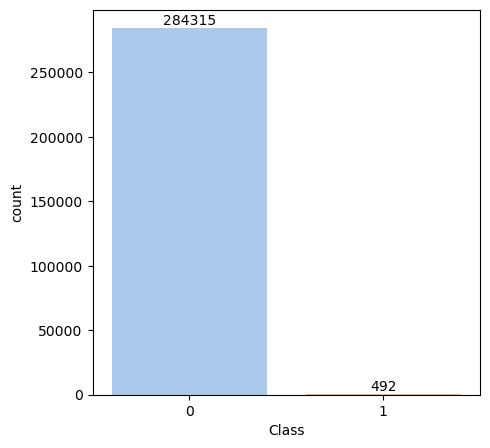

In [5]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = df['Class'], data = df, palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

In [6]:
count=pd.value_counts(df['Class'])
count

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
print('Dataset size: ', len(df))
print('Not Fraud:', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Fraud:', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Dataset size:  284807
Not Fraud: 99.83 % of the dataset
Fraud: 0.17 % of the dataset


Woah! there is very large diffrence between the class 0 and 1. It is an Imbalanced dataset<br>

Text(0.5, 1.0, 'Correlation Heatmap')

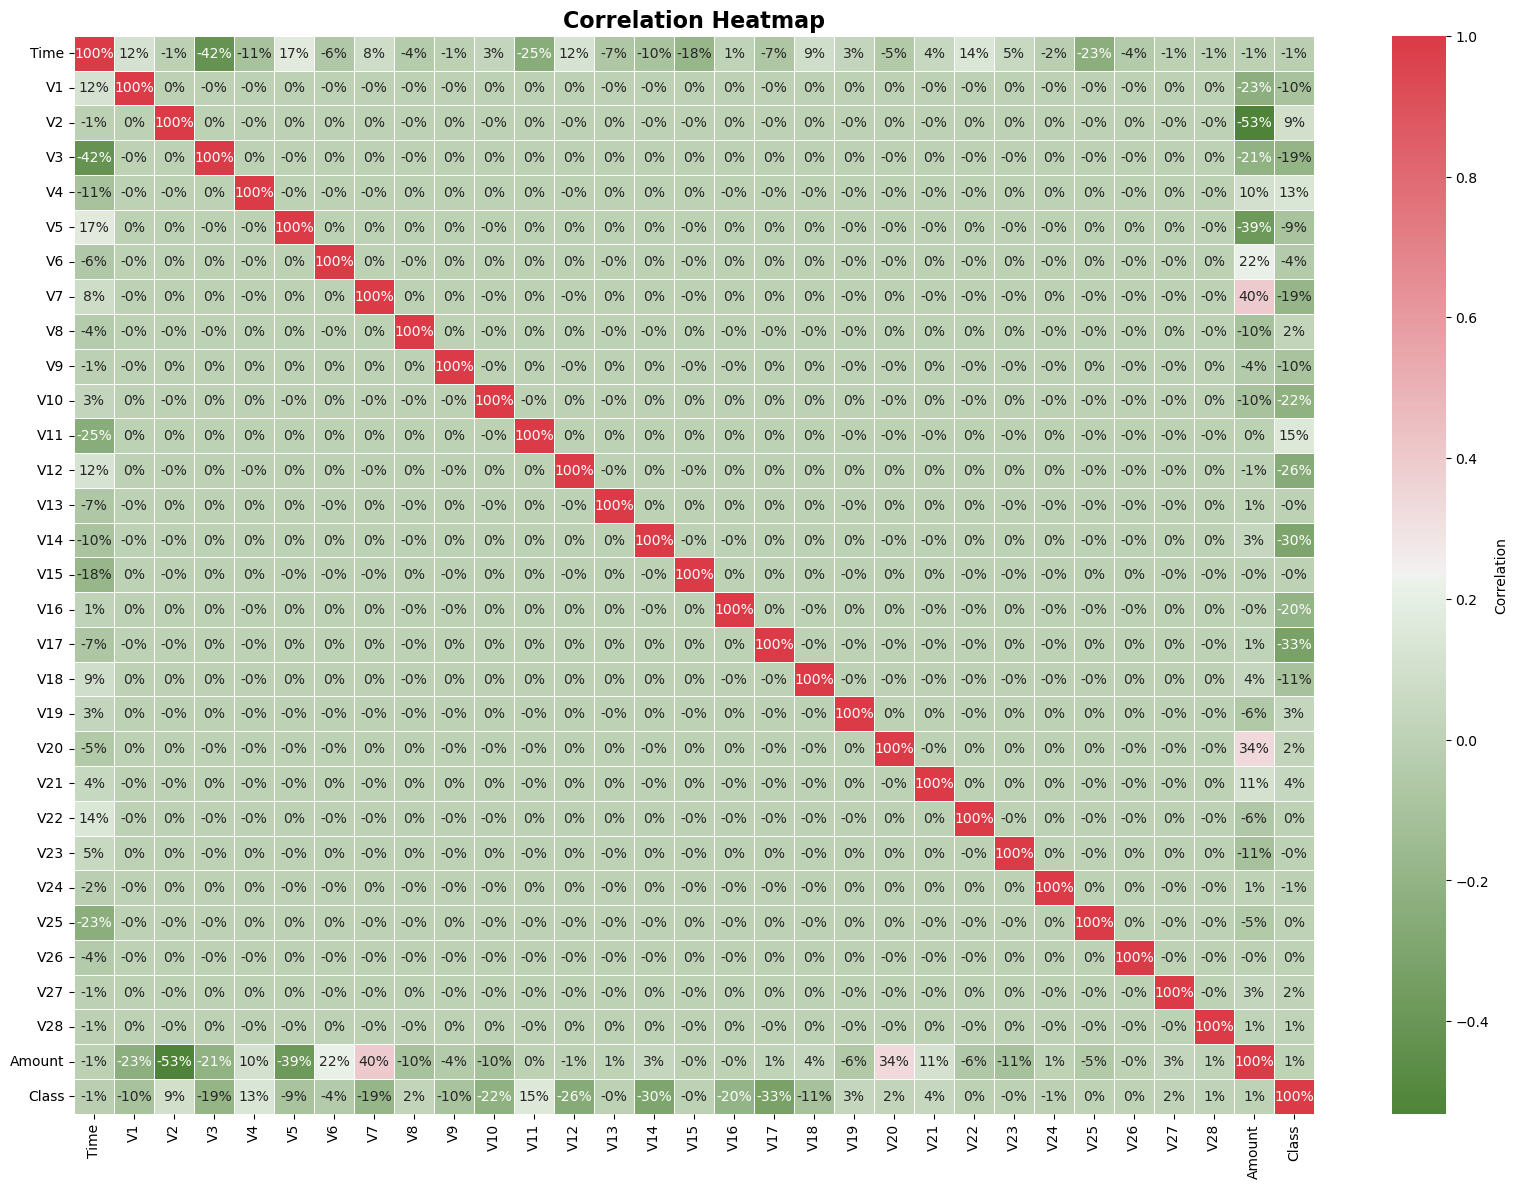

In [60]:
# Correlation Matrix

correlation_matrix = df.corr()
plt.figure(figsize=(20,14))

cmap_custom = sns.diverging_palette(120,10, as_cmap=True)

sns.heatmap(correlation_matrix, annot=True,cmap=cmap_custom, fmt='.0%', linewidths=0.5, cbar_kws={'label':'Correlation'})

plt.title('Correlation Heatmap', fontsize=16, fontweight= 'bold')

### Scaling Feature <a class="anchor" id="imbcheck"></a>

* After understanding the features of the data we saw that all the `V features` are scaled but the time and amount isnt. To create the completed scaled data for the independent features we will have to scale `Time` and `Amount`.

* The RobustScaler is used in this code because it is robust to outliers. If there are outliers in the 'Amount' or 'Time' columns, traditional scaling methods (like Min-Max scaling or Standard scaling) may be influenced by these outliers. The RobustScaler uses the median and interquartile range (IQR) to scale the data, making it less sensitive to outliers.

In [9]:
# Before scaling
df[['Time', 'Amount']]

,Time,Amount
0,0.0,149.62
1,0.0,2.69
2,1.0,378.66
3,1.0,123.50
4,2.0,69.99
...,...,...
284802,172786.0,0.77
284803,172787.0,24.79
284804,172788.0,67.88
284805,172788.0,10.00


In [10]:
# scaling the non scaled features

rob_scale = RobustScaler()

df['scaled_amount']=rob_scale.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_Time']=rob_scale.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Amount','Time'], axis=1,inplace=True)

In [11]:
# After scaling
df[['scaled_Time', 'scaled_amount']]

,scaled_Time,scaled_amount
0,-0.994983,1.783274
1,-0.994983,-0.269825
2,-0.994972,4.983721
3,-0.994972,1.418291
4,-0.994960,0.670579
...,...,...
284802,1.034951,-0.296653
284803,1.034963,0.038986
284804,1.034975,0.641096
284805,1.034975,-0.167680


# <font color="purple"><b>Preprocessing</b></font>

### Train/Test Split <a class="anchor" id="traintest"></a>

In [12]:
x = df.drop(columns='Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(199364, 30)
(199364,)
(85443, 30)
(85443,)


In [14]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 199364
Testing set size: 85443


In [15]:
zeros_count_or = (y_train == 0).sum().sum()
ones_count_or = (y_train == 1).sum().sum()

zeros_percentage_or = (zeros_count_or / len(y_train)) * 100
ones_percentage_or = (ones_count_or / len(y_train)) * 100

print(f"Not fraud in the original training data: {zeros_percentage_or:.2f}%")
print(f"Fraud in the original training data: {ones_percentage_or:.2f}%\n")

print("Number Fraud points in the original training data:", zeros_count_or)
print("Number Not fraud points in the original training data:", ones_count_or)

Not fraud in the original training data: 99.83%
Fraud in the original training data: 0.17%

Number Fraud points in the original training data: 199032
Number Not fraud points in the original training data: 332


# <font color="purple"><b>Data Imbalance Techniques</b></font>

# Oversampling <a class="anchor" id="oversampling"></a>

In [16]:
from sklearn.utils import resample

train_df = pd.concat([X_train,y_train],axis=1)


not_fraud = train_df[train_df.Class==0]
fraud = train_df[train_df .Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace = True, # sample with replacement
                          n_samples = len(not_fraud), # match number in majority class
                          random_state = 27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

zeros_count = (upsampled.Class == 0).sum()
ones_count = (upsampled.Class == 1).sum()
total_count = len(upsampled)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

print(f"Not fraud in oversampled data: {zeros_percentage:.2f}%")
print(f"Fraud in oversampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in oversampled data:", zeros_count)
print("Number of Fraud points in oversampled data:", ones_count)

Not fraud in oversampled data: 50.00%
Fraud in oversampled data: 50.00%

Number of Not fraud points in oversampled data: 199032
Number of Fraud points in oversampled data: 199032


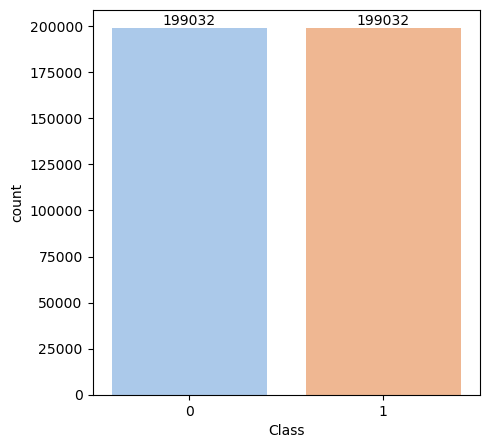

In [17]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = upsampled['Class'], data = upsampled, palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

### Random Oversampling Using Imblearn <a class="anchor" id="oversamplingimbl"></a>

In [18]:
random_oversampler = RandomOverSampler(sampling_strategy='auto')
X_train_over, y_train_over = random_oversampler.fit_resample(X_train, y_train)
X_test_over, y_test_over = random_oversampler.fit_resample(X_test, y_test)

zeros_count = (y_train_over == 0).sum()
ones_count = (y_train_over == 1).sum()
total_count = len(y_train_over)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in oversampled data: {zeros_percentage:.2f}%")
print(f"Fraud in oversampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in oversampled data:", zeros_count)
print(f"Number of Fraud points in oversampled data:, {ones_count}\n")

print(X_train_over.shape)
print(y_train_over.shape)
print(X_test_over.shape)
print(y_test_over.shape)

Not fraud in oversampled data: 50.00%
Fraud in oversampled data: 50.00%

Number of Not fraud points in oversampled data: 199032
Number of Fraud points in oversampled data:, 199032

(398064, 30)
(398064,)
(170566, 30)
(170566,)


### SMOTE (Synthetic Minority Oversampling Technique) <a class="anchor" id="smote"></a>

In [19]:
sm = SMOTE(random_state = 42, sampling_strategy='auto')
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
X_test_sm, y_test_sm = sm.fit_resample(X_test, y_test)


zeros_count = (y_train_sm == 0).sum()
ones_count = (y_train_sm == 1).sum()
total_count = len(y_train_sm)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in oversampled data: {zeros_percentage:.2f}%")
print(f"Fraud in oversampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in oversampled data:", zeros_count)
print(f"Number of Fraud points in oversampled data:, {ones_count}\n")

print(X_train_sm.shape)
print(y_train_sm.shape)
print(X_test_sm.shape)
print(y_test_sm.shape)

Not fraud in oversampled data: 50.00%
Fraud in oversampled data: 50.00%

Number of Not fraud points in oversampled data: 199032
Number of Fraud points in oversampled data:, 199032

(398064, 30)
(398064,)
(170566, 30)
(170566,)


# Undersampling <a class="anchor" id="undersampling"></a>  

In [20]:
nfraud_undersampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
undersampled = pd.concat([nfraud_undersampled, fraud])

zeros_count = (undersampled.Class == 0).sum()
ones_count = (undersampled.Class == 1).sum()
total_count = len(undersampled)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in undersampled data: {zeros_percentage:.2f}%")
print(f"Fraud in undersampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in undersampled data:", zeros_count)
print("Number of Fraud points in undersampled data:", ones_count)

Not fraud in undersampled data: 50.00%
Fraud in undersampled data: 50.00%

Number of Not fraud points in undersampled data: 332
Number of Fraud points in undersampled data: 332


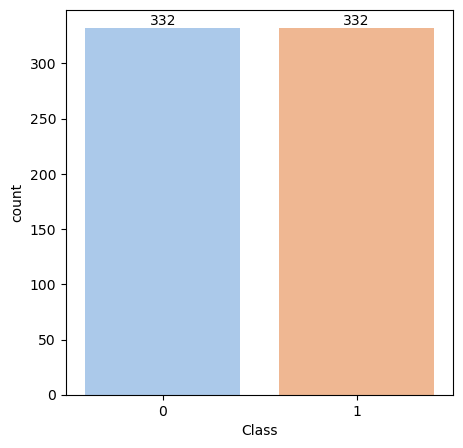

In [21]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = undersampled['Class'], data = upsampled, palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

### Random Undersampling Using Imblearn <a class="anchor" id="undersamplingimbl"></a>   

In [22]:
random_undsampler = RandomUnderSampler(sampling_strategy='auto')
X_train_under, y_train_under = random_undsampler.fit_resample(X_train, y_train)
X_test_under, y_test_under = random_undsampler.fit_resample(X_test, y_test)

# Calculate the counts and percentages
zeros_count = (y_train_under == 0).sum()
ones_count = (y_train_under == 1).sum()
total_count = len(y_train_under)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

# Print the results
print(f"Not fraud in undersampled data: {zeros_percentage:.2f}%")
print(f"Fraud in undersampled data: {ones_percentage:.2f}%\n")
print("Number of Not fraud points in undersampled data:", zeros_count)
print(f"Number of Fraud points in undersampled data:, ones_count\n")

print(X_train_under.shape)
print(y_train_under.shape)
print(X_test_under.shape)
print(y_test_under.shape)

Not fraud in undersampled data: 50.00%
Fraud in undersampled data: 50.00%

Number of Not fraud points in undersampled data: 332
Number of Fraud points in undersampled data:, ones_count

(664, 30)
(664,)
(320, 30)
(320,)


### The class has been balanced by equal values. Lets perform modeling on this new balanced data

### Baseline Model

In [23]:
y_baseline = df['Class'].value_counts(normalize=True).max()
print(f'baseline score = {y_baseline}')

baseline score = 0.9982725143693799


# <font color="purple"><b>Logistic Regression</b></font>

In [24]:
# logistic model for our normal data and oversampled data and undersampled
log = LogisticRegression(max_iter=400)
logover = LogisticRegression(max_iter=400)
logunder = LogisticRegression(max_iter=400)

# fit our normal data
log.fit(X_train,y_train)

# fit our oversampled data
logover.fit(X_train_over,y_train_over)

# fit our oversampled data
logunder.fit(X_train_under,y_train_under)

LogisticRegression(max_iter=400)

### Evaluate

### Train Data

In [25]:
# get the prediction score for our logistic Regression model on our train data
print(f'The accuracy score for logistic Regression Model On Normal Data = {accuracy_score(y_train,log.predict(X_train))}')
print(f'The accuracy score for logistic Regression Model On Oversampled Data = {accuracy_score(y_train,logover.predict(X_train))}')
print(f'The accuracy score for logistic Regression Model On Undersampled Data = {accuracy_score(y_train,logunder.predict(X_train))}')

The accuracy score for logistic Regression Model On Normal Data = 0.9992576392929516
The accuracy score for logistic Regression Model On Oversampled Data = 0.9759786119861158
The accuracy score for logistic Regression Model On Undersampled Data = 0.9702955398166169


### Test Data

In [26]:
# get the prediction score for our logistic Regression model on our test data
print(f'The accuracy score for logistic Regression Model On Normal Data = {accuracy_score(y_test,log.predict(X_test))}')
print(f'The accuracy score for logistic Regression Model On Oversampled Data = {accuracy_score(y_test,logover.predict(X_test))}')
print(f'The accuracy score for logistic Regression Model On Undersampled Data = {accuracy_score(y_test,logunder.predict(X_test))}')

The accuracy score for logistic Regression Model On Normal Data = 0.9990285921608558
The accuracy score for logistic Regression Model On Oversampled Data = 0.9759137670727853
The accuracy score for logistic Regression Model On Undersampled Data = 0.970647098065377


### as you see we our accuracy score is not the best thing in compare to our baseline score
### but thats ok in these types of model our most important metrics is Recall

# Confusion Matrix & Classification report

In [27]:
# Make Confusion matrix function to see more details about our model perdiction

def confusion(model, x, y, title=None):
    predictions = model.predict(x)
    display = ConfusionMatrixDisplay.from_estimator(model, x, y)

    # Check if a title is provided
    if title:
        display.figure_.suptitle(title, y=1.02)


In [28]:
# function to evaluate model
def evalua(model,x,y):
    print('precision_score =',precision_score(y,model.predict(x)).round(2)*100,'%')
    print('recall_score =',recall_score(y,model.predict(x)).round(2)*100,'%')
    print('f1_score =',f1_score(y,model.predict(x)).round(2)*100,'%')
    print('----------------------------------------')

### Log Models

In [29]:
# print log models score
print('Normal Data')
evalua(log,X_test,y_test)

print('Oversampled Data')
evalua(logover,X_test,y_test)

print('Undersampled Data')
evalua(logunder,X_test,y_test)

Normal Data
precision_score = 83.0 %
recall_score = 60.0 %
f1_score = 70.0 %
----------------------------------------
Oversampled Data
precision_score = 7.000000000000001 %
recall_score = 92.0 %
f1_score = 12.0 %
----------------------------------------
Undersampled Data
precision_score = 6.0 %
recall_score = 92.0 %
f1_score = 11.0 %
----------------------------------------


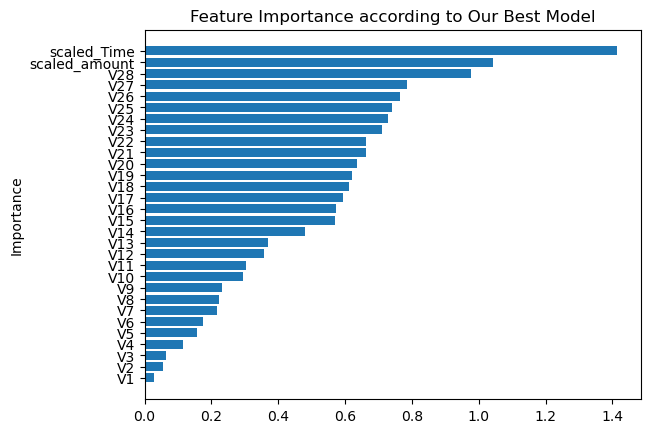

In [30]:
# Our Higest Recall and precision and f1 score is over# Get the feature importances
importance = abs(logover.coef_[0])
importance.sort()

# Plot the feature importances
plt.barh(x.columns, importance)
plt.title('Feature Importance according to Our Best Model')
plt.ylabel('Importance')
plt.show()

None


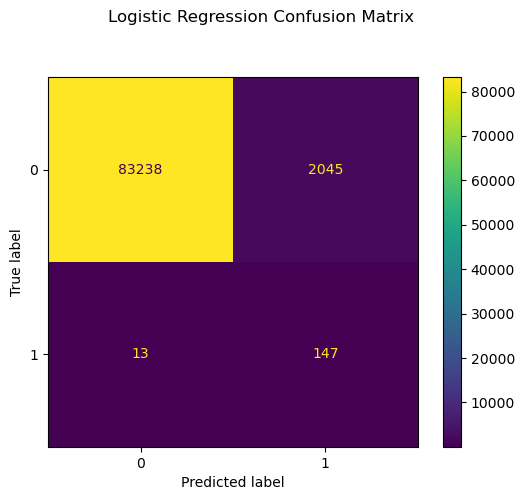

In [31]:
#sampled data
print(confusion(logover,X_test,y_test,"Logistic Regression Confusion Matrix"))

# Random Forest

In [ ]:
# # logistic model for our normal data and oversampled data and undersampled
rf = RandomForestClassifier()
rfover = RandomForestClassifier()
rfunder = RandomForestClassifier()

# fit our normal data
rf.fit(X_train,y_train)

# fit our oversampled data
rfover.fit(X_train_over,y_train_over)

# fit our oversampled data
rfunder.fit(X_train_under,y_train_under)

### Evaluate

### Train Data

In [37]:
# get the prediction score for our Random Forest Classification model on our train data
print(f'The accuracy score for Random Forest Classification Model On Normal Data = {accuracy_score(y_train,rf.predict(X_train))}')
print(f'The accuracy score for Random Forest Classification Model On Oversampled Data = {accuracy_score(y_train,rfover.predict(X_train))}')
print(f'The accuracy score for Random Forest Classification Model On Undersampled Data = {accuracy_score(y_train,rfunder.predict(X_train))}')

The accuracy score for Random Forest Classification Model On Normal Data = 0.9999949840492767
The accuracy score for Random Forest Classification Model On Oversampled Data = 1.0
The accuracy score for Random Forest Classification Model On Undersampled Data = 0.9731847274332377


### Test Data

In [38]:
# get the prediction score for our Random Forest Classification model on our test data
print(f'The accuracy score for Random Forest Classification Model On Normal Data = {accuracy_score(y_test,rf.predict(X_test))}')
print(f'The accuracy score for Random Forest Classification Model On Oversampled Data = {accuracy_score(y_test,rfover.predict(X_test))}')
print(f'The accuracy score for Random Forest Classification Model On Undersampled Data = {accuracy_score(y_test,rfunder.predict(X_test))}')

The accuracy score for Random Forest Classification Model On Normal Data = 0.9994967405170698
The accuracy score for Random Forest Classification Model On Oversampled Data = 0.9995669627705019
The accuracy score for Random Forest Classification Model On Undersampled Data = 0.9738890254321595


### Log Models

In [39]:
# print log models score
print('Normal Data')
evalua(rf,X_test,y_test)

print('Oversampled Data')
evalua(rfover,X_test,y_test)

print('Undersampled Data')
evalua(rfunder,X_test,y_test)

Normal Data
precision_score = 94.0 %
recall_score = 78.0 %
f1_score = 85.0 %
----------------------------------------
Oversampled Data
precision_score = 95.0 %
recall_score = 81.0 %
f1_score = 88.0 %
----------------------------------------
Undersampled Data
precision_score = 6.0 %
recall_score = 91.0 %
f1_score = 12.0 %
----------------------------------------


### Confusion Matrix

None


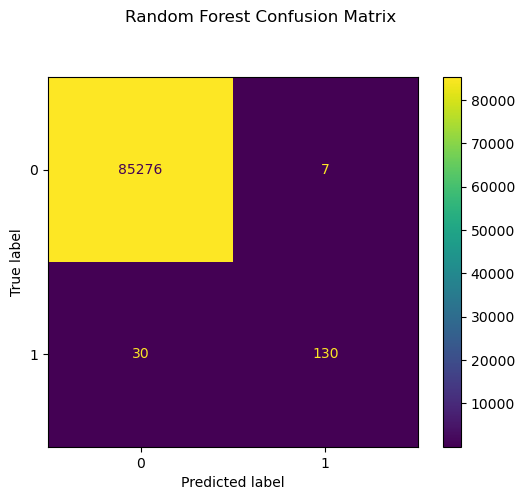

In [36]:
print(confusion(rfover,X_test,y_test,"Random Forest Confusion Matrix"))

### Conclusion:

* Logistic regression and Random Forest Classifier with oversampling performed better with 99% accuracy in testing as compared to others.